<h1 style="color:#002366; font-size:48px; font-family:'Segoe UI', sans-serif; text-decoration:underline;">
  <strong>Job Market Analysis & Recommendation System using Python, NLP, and Streamlit</strong>
</h>


<h2 style="color:#8B4513; font-size:32px; font-family:'Segoe UI', sans-serif; text-decoration:underline;">
  <strong>🎯 Objective</strong>
</h2>

<ul style="color:#4B3621; font-size:20px; font-family:'Segoe UI', sans-serif;">
  <li>Analyze real-world job market data from Upwork and similar platforms.</li>
  <li>Identify salary trends, top countries, and emerging job categories.</li>
  <li>Build a personalized job recommendation engine using NLP and TF-IDF.</li>
  <li>Detect remote work patterns and visualize posting intensity over time.</li>
  <li>Integrate advanced features like skill gap analysis and resume feedback assistant.</li>
  <li>Deploy the system using Streamlit for interactive user experience.</li>
</ul>

# STEPS :


1️⃣ Data Cleaning
Handled missing values, duplicates, and formatted dates for analysis.

2️⃣ EDA
Explored salary, country, and posting trends visually.

3️⃣ Salary vs Title Keywords
Mapped job title keywords to hourly rates using NLP.

4️⃣ Emerging Roles
Identified fast-growing job categories by posting frequency.

5️⃣ Demand Forecasting
Predicted future job demand using regression models.

6️⃣ Country Salary Comparison
Compared average hourly rates across locations.

7️⃣ Remote Work Trends
Analyzed growth in remote jobs over time.

8️⃣ Job Recommendation Engine
Suggested jobs using TF-IDF and cosine similarity.

9️⃣ Advanced Features
Added skill gap analyzer, resume matcher, and calendar heatmap.

🔟 Model Saving
Saved .pkl files for deployment in Streamlit or Flask.

# IMPORT LIABRERIES : 

In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# Step 1: Load Data

In [17]:
file_path = r"C:\Users\DEEPA\OneDrive\ドキュメント\DIGICROME CLASS\Internship project\Project 8\All_upwork_jobs_2024-02-07-2024-03-24.csv"

try:
    df = pd.read_csv(file_path)
    print(" File loaded successfully.")
except Exception as e:
    print(" Error loading file:", e)

df.head()

 File loaded successfully.


,title,link,published_date,is_hourly,hourly_low,hourly_high,budget,country
0,Experienced Media Buyer For Solar Pannel and R...,https://www.upwork.com/jobs/Experienced-Media-...,2024-02-17 09:09:54+00:00,False,NaN,NaN,500.0,NaN
1,Full Stack Developer,https://www.upwork.com/jobs/Full-Stack-Develop...,2024-02-17 09:09:17+00:00,False,NaN,NaN,1100.0,United States
2,SMMA Bubble App,https://www.upwork.com/jobs/SMMA-Bubble-App_%7...,2024-02-17 09:08:46+00:00,True,10.0,30.0,NaN,United States
3,Talent Hunter Specialized in Marketing,https://www.upwork.com/jobs/Talent-Hunter-Spec...,2024-02-17 09:08:08+00:00,True,NaN,NaN,NaN,United States
4,Data Engineer,https://www.upwork.com/jobs/Data-Engineer_%7E0...,2024-02-17 09:07:42+00:00,False,NaN,NaN,650.0,India


# Step 2: Check Missing, Nulls, Duplicates

In [21]:
print(" Missing values:\n", df.isnull().sum())
print("\n Duplicate rows:", df.duplicated().sum())
print("\n Column names:", df.columns.tolist())

 Missing values:
 title                  1
link                   1
published_date         0
is_hourly              0
hourly_low        142406
hourly_high       146053
budget            140937
country             5077
dtype: int64

 Duplicate rows: 0

 Column names: ['title', 'link', 'published_date', 'is_hourly', 'hourly_low', 'hourly_high', 'budget', 'country']


# Step 3: Clean Data

In [24]:
# Drop duplicates
df.drop_duplicates(inplace=True)

In [26]:
# Drop rows missing essential fields
df.dropna(subset=['title', 'hourly_low', 'hourly_high', 'country'], inplace=True)

In [28]:
# Fill optional fields
df['budget'] = df['budget'].fillna(0)
df['is_hourly'] = df['is_hourly'].fillna(False)

In [30]:
# Create average hourly rate
df['avg_hourly_rate'] = (df['hourly_low'] + df['hourly_high']) / 2

In [32]:
# Convert date
df['published_date'] = pd.to_datetime(df['published_date'], errors='coerce')
df['month'] = df['published_date'].dt.to_period('M')

# Step 4: EDA & Visualizations

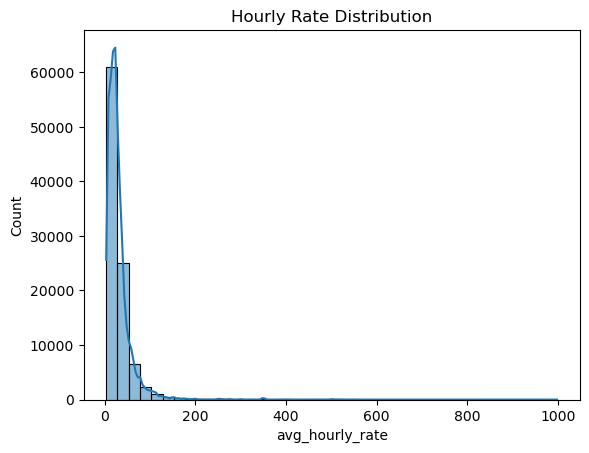

In [35]:
# Hourly rate distribution
sns.histplot(df['avg_hourly_rate'], bins=40, kde=True)
plt.title("Hourly Rate Distribution")
plt.show()

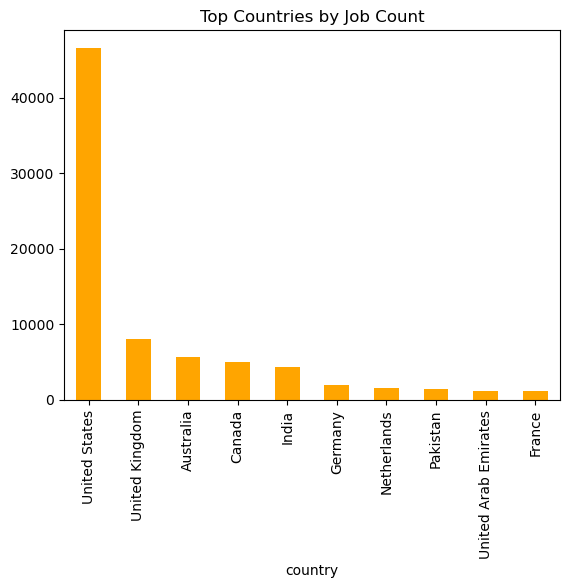

In [37]:
# Top countries
df['country'].value_counts().head(10).plot(kind='bar', color='orange')
plt.title("Top Countries by Job Count")
plt.show()

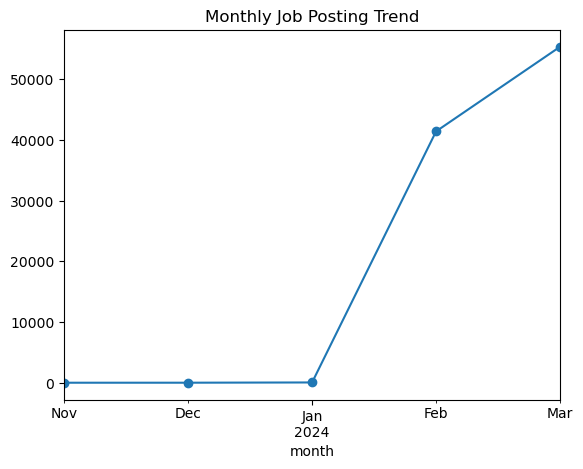

In [39]:
# Monthly job trend
df.groupby('month').size().plot(marker='o')
plt.title("Monthly Job Posting Trend")
plt.show()

# Step 5: Salary vs Title Keywords

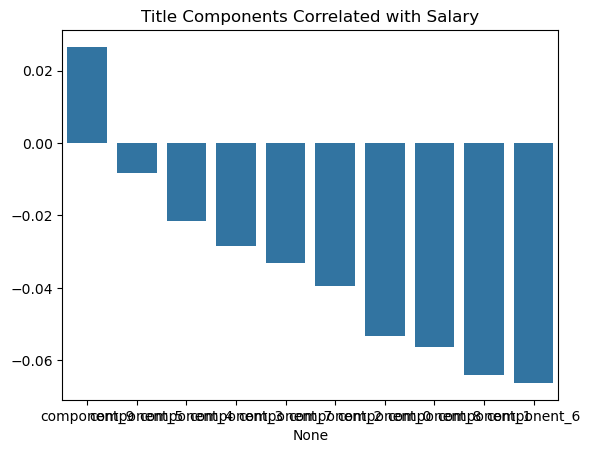

In [42]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import TruncatedSVD

vectorizer = CountVectorizer(stop_words='english', max_features=5000)
X = vectorizer.fit_transform(df['title'])

svd = TruncatedSVD(n_components=10, random_state=42)
X_reduced = svd.fit_transform(X)

svd_df = pd.DataFrame(X_reduced, columns=[f'component_{i}' for i in range(10)])
svd_df['avg_hourly_rate'] = df['avg_hourly_rate'].values

correlations = svd_df.corr()['avg_hourly_rate'].sort_values(ascending=False).drop('avg_hourly_rate')
sns.barplot(x=correlations.index, y=correlations.values)
plt.title("Title Components Correlated with Salary")
plt.show()

# Step 6: Remote Work Trend

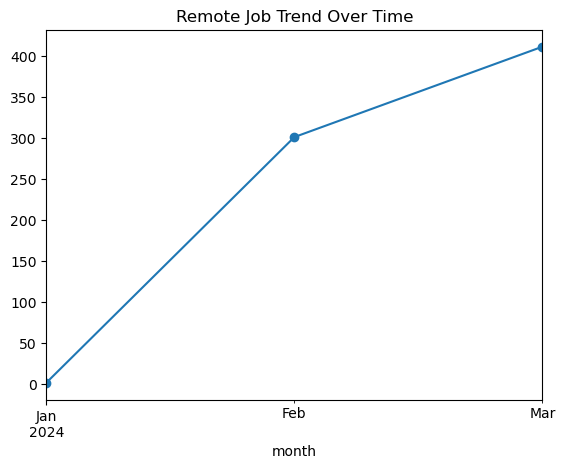

In [44]:
df['is_remote'] = df['title'].str.contains('remote', case=False) | df['country'].str.contains('remote', case=False)
df[df['is_remote']].groupby('month').size().plot(marker='o')
plt.title("Remote Job Trend Over Time")
plt.show()

# Step 7: Country-wise Salary Comparison

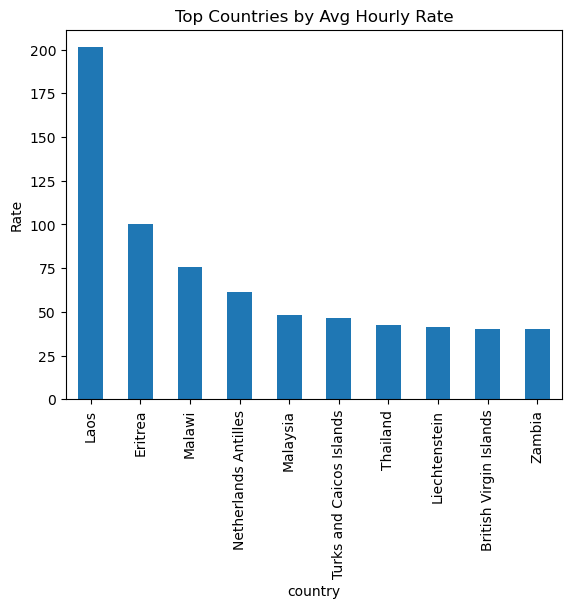

In [48]:
df.groupby('country')['avg_hourly_rate'].mean().sort_values(ascending=False).head(10).plot(kind='bar')
plt.title("Top Countries by Avg Hourly Rate")
plt.ylabel("Rate")
plt.show()

# Step 8: Job Recommendation Engine

In [51]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

tfidf = TfidfVectorizer(stop_words='english')
tfidf_matrix = tfidf.fit_transform(df['title'])

def recommend_jobs(user_input, top_n=5):
    user_vec = tfidf.transform([user_input])
    similarity = cosine_similarity(user_vec, tfidf_matrix).flatten()
    top_indices = similarity.argsort()[-top_n:][::-1]
    return df.iloc[top_indices][['title', 'avg_hourly_rate', 'country']]

recommend_jobs("data analyst")

,title,avg_hourly_rate,country
74619,Data Analyst,21.5,India
66780,Data Analyst,34.0,Saudi Arabia
45403,Data analyst,21.5,Morocco
94535,Data Analyst,21.5,Bangladesh
74810,Data analyst,21.5,Bangladesh


# Step 9: Forecast Job Market

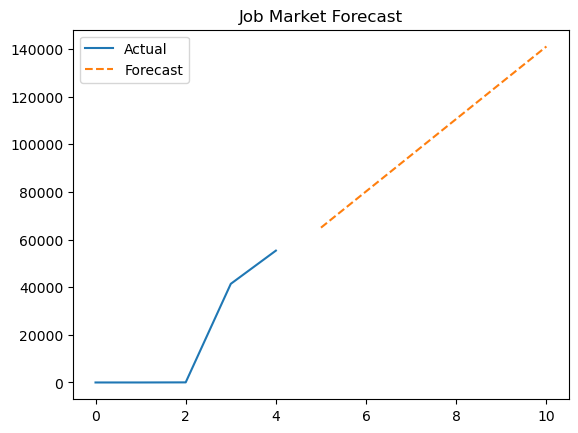

In [54]:
from sklearn.linear_model import LinearRegression

df_monthly = df.groupby('month').size().reset_index(name='job_count')
df_monthly['month_num'] = np.arange(len(df_monthly))

X = df_monthly[['month_num']]
y = df_monthly['job_count']
model = LinearRegression().fit(X, y)

future = pd.DataFrame({'month_num': range(len(df_monthly), len(df_monthly)+6)})
future['predicted_jobs'] = model.predict(future[['month_num']])

plt.plot(df_monthly['month_num'], df_monthly['job_count'], label='Actual')
plt.plot(future['month_num'], future['predicted_jobs'], label='Forecast', linestyle='--')
plt.legend()
plt.title("Job Market Forecast")
plt.show()

# Step 10 : Skill Gap Analyzer

In [57]:
# Define the function
def skill_gap(user_skills, top_n=10):
    from sklearn.feature_extraction.text import TfidfVectorizer
    import numpy as np
    from sklearn.metrics.pairwise import cosine_similarity

    top_titles = df['title'].value_counts().head(top_n).index.tolist()
    vectorizer = TfidfVectorizer(stop_words='english')
    tfidf_matrix = vectorizer.fit_transform(top_titles)
    user_vec = vectorizer.transform([user_skills])

    similarity = cosine_similarity(user_vec, tfidf_matrix).flatten()
    matched_title = top_titles[np.argmax(similarity)]
    missing_keywords = set(matched_title.lower().split()) - set(user_skills.lower().split())

    print(" Closest Matching Role:", matched_title)
    print(" Missing Keywords:", missing_keywords)

# Call the function
skill_gap("python sql excel")


 Closest Matching Role: Social Media Manager
 Missing Keywords: {'media', 'manager', 'social'}


# Step 11 : Job Posting Calendar Heatmap

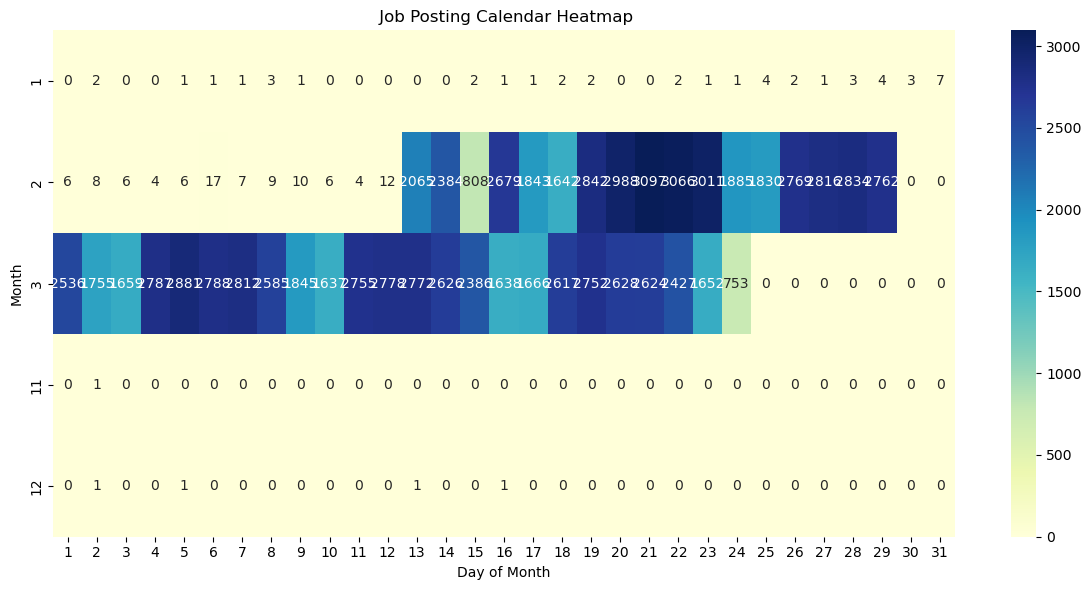

In [60]:
# Step-by-step fix for Calendar Heatmap
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Ensure 'published_date' is datetime
df['published_date'] = pd.to_datetime(df['published_date'], errors='coerce')
df['day'] = df['published_date'].dt.date

# Group by day
daily_counts = df.groupby('day').size().reset_index(name='job_count')

# Convert 'day' back to datetime for .dt access
daily_counts['day'] = pd.to_datetime(daily_counts['day'])
daily_counts['month'] = daily_counts['day'].dt.month
daily_counts['day_num'] = daily_counts['day'].dt.day

# Create pivot table
pivot_table = daily_counts.pivot_table(index='month', columns='day_num', values='job_count', fill_value=0)

# Plot heatmap with float-safe formatting
plt.figure(figsize=(12,6))
sns.heatmap(pivot_table, cmap='YlGnBu', annot=True, fmt='.0f')  #  changed 'd' to '.0f'
plt.title(" Job Posting Calendar Heatmap")
plt.xlabel("Day of Month")
plt.ylabel("Month")
plt.tight_layout()
plt.show()

# Step 12 : Resume Feedback Assistant (Simulated)

In [63]:
# Define the function
def resume_feedback(resume_text):
    resume_vec = tfidf.transform([resume_text])
    similarity = cosine_similarity(resume_vec, tfidf_matrix).flatten()
    top_match = df.iloc[similarity.argsort()[-1]]
    print(" Resume matches best with:", top_match['title'])
    print(" Expected Rate:", top_match['avg_hourly_rate'], "|  Country:", top_match['country'])

# Call the function
resume_feedback("Experienced data analyst with skills in Python, SQL, Excel, and machine learning.")


 Resume matches best with: An Expert Python Machine Learning Developer
 Expected Rate: 40.0 |  Country: United Kingdom


# Step 13: Save Model as .pkl File

In [66]:
import pickle

# Save TF-IDF vectorizer
with open('tfidf_vectorizer.pkl', 'wb') as f:
    pickle.dump(tfidf, f)

# Step 14: Save cleaned job dataset

In [69]:
# Save cleaned job dataset
with open('job_data.pkl', 'wb') as f:
    pickle.dump(df, f)

print(" TF-IDF model and job dataset saved successfully.")

 TF-IDF model and job dataset saved successfully.
